In [ ]:
"""
Piecewise Linear Transformation Functions

1-) Contrast stretching

2-) Intensity-level slicing
        -> Binary slicing
        -> Lineer slicing

"""

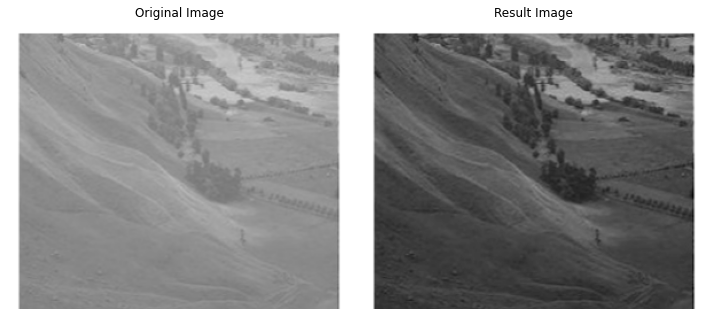

In [35]:
""" 
1-) Contrast stretching 

Low-contrast or High-contrast images can result of lots of different reason.

Contrast stretching is a process that expand the range of intensity levels in an image 
so that it spans the full intensity range of the recording or display device. (Digital Image Processing 3rd ed. - R. Gonzalez, R. Woods)


General Formula of Contrast stretching ==> s = [ (r - rmin) x [ (Imax - Imin) / (rmax - rmin) ] ] + Imin

                                           r: current pixel intensity value
                                           rmin: minimum intensity value present in the whole image
                                           rmax: maximum intensity value present in the whole image
                                           s: output intensity and s should be integer value

                                           Imin and Imax related to intensity range of the recording or display device. 
                                           For instance, in 8-bit grayscale image Imin=0 and Imax=255



"""
import numpy as np


def rescale(img):
  m = img.astype(float)
  m -= np.min(m)
  m /= np.max(m)

  return (m*255).astype(np.uint8)


def contrast_streching(image):
  r_min = np.min(image)
  r_max= np.max(image)

  # for this format ( 8-bit grayscale image) Imin=0 and Imax=255
  Imax = 255
  Imin = 0

  s = ( (image - r_min) * ( (Imax - Imin) / (r_max-r_min) ) ) + Imin

  s = rescale(s)

  return s


result_img = contrast_streching(img)


# Display images
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].axis('off')
ax[0].title.set_text('Original Image')
ax[0].imshow(img, cmap='gray')

ax[1].axis('off')
ax[1].title.set_text('Result Image')
ax[1].imshow(result_img, cmap='gray')

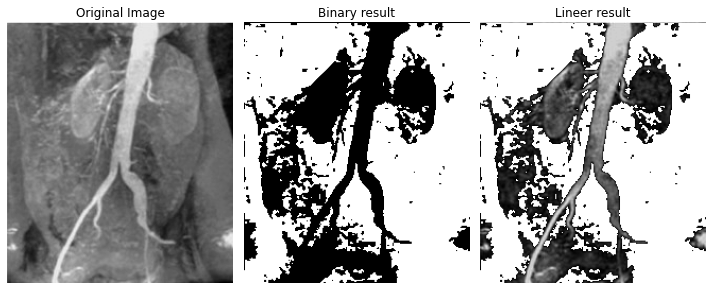

In [40]:
"""
2-) Intensity-level slicing
        
It is used to emphasize a special range of intensity in a image

It is used in many different fields such as X-ray images and Satellite images

"""

import numpy as np
from matplotlib import pyplot as plt

# Binary slicing

def binary_slicing(img, low_range, high_range, low_value, high_value):
  output_img = np.full_like(img, low_value)

  index = np.logical_and(img>low_range, img<high_range)
  output_img[index] = high_value 

  return output_img



# Lineer slicing

def lineer_slicing(img, low_range, high_range, value):
  output_img = img.copy()

  index = np.logical_and(img>low_range, img<high_range)
  output_img[index] = value 

  return output_img


# Binary result
low_range = 50
high_range = 150
low_value = 10
high_value = 255

binary_output = binary_slicing(img, low_range, high_range, low_value, high_value)


# Lineer result

low_range = 50
high_range = 150
value = 255
 
lineer_output = lineer_slicing(img, low_range, high_range, value)

# Display images
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].axis('off')
ax[0].title.set_text('Original Image')
ax[0].imshow(img, cmap='gray')

ax[1].axis('off')
ax[1].title.set_text('Binary result')
ax[1].imshow(binary_output, cmap='gray')

ax[2].axis('off')
ax[2].title.set_text('Lineer result')
ax[2].imshow(lineer_output, cmap='gray')